### Analysis

Query the database based on vaccination provided and analysis with graph

Read all the query in Queries.sql file

In [1]:
from csvRW import read_sql
from query import queryDB

import numpy as np  
import matplotlib.pyplot as plt  

queries = read_sql('../Queries.sql')

#### Graphical understanding of observation for vaccination administered in between two month.

List the months, the total number of vaccines administered in each observation months in each of all countries.

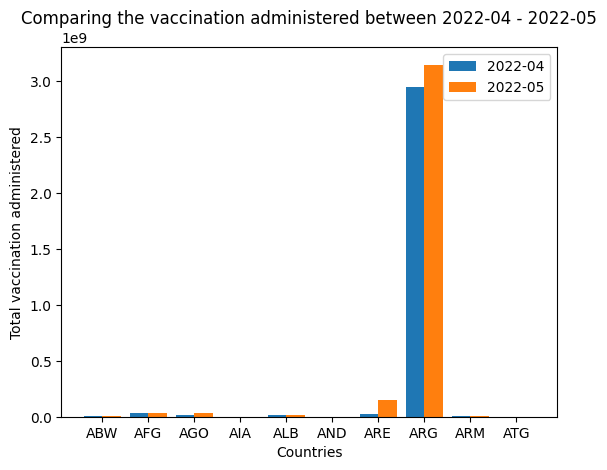

In [10]:
result  = queryDB(queries[0])

country  = queryDB("SELECT iso_code, location FROM country;")
country = dict(map(reversed, country))

X = []
observation1 = []
observation2 = []

for count,(obs1,location,obsV1, obs2, obsV2,diff ) in enumerate(result):
    X.append(country[location])
    observation1.append(obsV1)
    observation2.append(obsV2)
    if count > 8:
        break

X_axis = np.arange(len(X)) 

plt.bar(X_axis - 0.2, observation1, 0.4, label = result[0][0]) 
plt.bar(X_axis + 0.2, observation2, 0.4, label = result[0][3]) 

plt.xticks(X_axis, X) 
plt.xlabel("Countries") 
plt.ylabel("Total vaccination administered") 
plt.title(f"Comparing the vaccination administered between {result[0][0]} - {result[0][3]}") 
plt.legend() 
plt.show() 